In [1]:
#use Lasso to select features
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# get the all file name under the folder
import os
import time
path = '/Users/jeremyg/Documents/GitHub/SummerIndependentProject/tickData/factors_data/'

In [2]:
# calculate the correlation matrix and heat map
data = pd.read_csv(path + 'DBF_factors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
spread,1.000000,0.967845,0.922194,0.856594,0.376212,0.343174,0.177440,0.378445,0.979760,0.941588,0.889498,0.035653,-0.355888,-0.243624,0.066025,-0.199295,-0.150305
MA_5,0.967845,1.000000,0.959365,0.889628,0.357365,0.366525,0.078893,0.213245,0.997322,0.976509,0.923863,0.025995,-0.367720,-0.245866,0.065374,-0.207061,-0.073802
MA_20,0.922194,0.959365,1.000000,0.945522,0.133162,0.221914,-0.159324,0.026458,0.962467,0.995957,0.971632,-0.001131,-0.379046,-0.239657,0.070090,-0.193436,-0.036681
MA_60,0.856594,0.889628,0.945522,1.000000,-0.089835,-0.063408,-0.083383,-0.078006,0.893441,0.949422,0.992748,0.005152,-0.390301,-0.235674,0.062928,-0.159172,-0.022197
MACD,0.376212,0.357365,0.133162,-0.089835,1.000000,0.916150,0.462878,0.693036,0.350741,0.174258,-0.012927,0.073065,-0.005228,-0.062911,0.018166,-0.125664,-0.139248
MACDsignal,0.343174,0.366525,0.221914,-0.063408,0.916150,1.000000,0.068756,0.473390,0.357080,0.234950,0.028291,0.035088,-0.009213,-0.056637,0.026665,-0.138412,-0.069292
MACDhist,0.177440,0.078893,-0.159324,-0.083383,0.462878,0.068756,1.000000,0.678013,0.083295,-0.085869,-0.094784,0.104254,0.007364,-0.031330,-0.013756,-0.006673,-0.193338
RSI,0.378445,0.213245,0.026458,-0.078006,0.693036,0.473390,0.678013,1.000000,0.238023,0.068304,-0.039219,0.091936,-0.001151,-0.049420,0.009258,-0.055473,-0.306263
EMA_5,0.979760,0.997322,0.962467,0.893441,0.350741,0.357080,0.083295,0.238023,1.000000,0.978794,0.927337,0.026163,-0.369178,-0.247046,0.066686,-0.206700,-0.087991
EMA_20,0.941588,0.976509,0.995957,0.949422,0.174258,0.234950,-0.085869,0.068304,0.978794,1.000000,0.974549,0.007347,-0.382329,-0.244239,0.067487,-0.195902,-0.047206


In [3]:
data

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
2022-09-01 09:05:00,0.002486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.981132,7.726109,5726.851698,1.000485,0.880359,-0.001763
2022-09-01 09:10:00,0.000723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.962264,7.734394,10994.520010,1.000000,1.127169,0.000480
2022-09-01 09:15:00,0.001203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.943396,7.728449,15455.394724,1.000000,0.494643,0.000129
2022-09-01 09:20:00,0.001332,0.001419,NaN,NaN,NaN,NaN,NaN,NaN,0.001419,NaN,NaN,0.924528,7.726409,18265.301179,1.000000,0.302086,-0.000548
2022-09-01 09:25:00,0.000783,0.001079,NaN,NaN,NaN,NaN,NaN,NaN,0.001207,NaN,NaN,0.905660,7.723597,23271.846596,1.000000,0.488091,0.000458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:05:00,-0.001676,-0.001324,-0.001662,-0.001677,0.000127,0.000048,0.000079,49.613421,-0.001315,-0.001589,-0.001614,0.075472,7.875689,49147.506127,1.000000,0.722755,0.000580
2023-06-30 13:10:00,-0.001096,-0.001134,-0.001632,-0.001672,0.000150,0.000069,0.000081,53.719053,-0.001242,-0.001542,-0.001597,0.056604,7.875689,49947.885267,1.000000,0.709043,0.000677
2023-06-30 13:15:00,-0.000419,-0.000839,-0.001576,-0.001649,0.000220,0.000099,0.000121,58.018354,-0.000968,-0.001435,-0.001558,0.037736,7.873951,51607.447162,1.000000,0.677783,0.000452
2023-06-30 13:20:00,0.000033,-0.000782,-0.001488,-0.001613,0.000308,0.000141,0.000167,60.648121,-0.000634,-0.001295,-0.001506,0.018868,7.873759,54236.161032,1.000000,0.688072,0.000271


In [9]:
# according to the correlation matrix, we can see that the spread is highly correlated with delta_1
# list = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
list = ['spread', 'RSI']

In [5]:
def valid_date_n_days_later(start, all_data, n):
    i = 1
    while i <= n:
        start = start + pd.DateOffset(days=1)
        if start in all_data.index:
            i = i + 1
        if start > all_data.index[-1]:
            return False
    return start

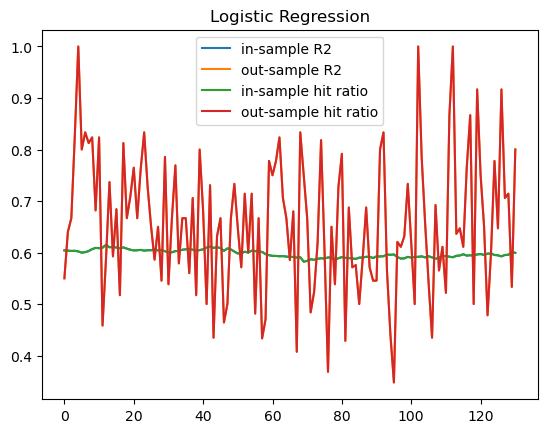

in-sample R2:  0.5978562169240008
out-sample R2:  0.6573617442096227
in-sample RMSE:  1.2682425092652345
out-sample RMSE:  1.1377941828130251
in-sample hit ratio:  0.5978562169240008
out-sample hit ratio:  0.6573617442096227


In [13]:
from model_testing import test_OLS, test_logistic

# test_OLS(data, list, pd.to_datetime('2022-11-02 09:05:00'), 20, 5)
test_logistic(data, list, pd.to_datetime('2022-09-02 09:05:00'), 60, 1, 'RSI',0.8, 0.2)